# DS 340W PROJECT - HOUSE PRICE PREDICTION
Group 10: Brianna Malone, and Alvaro Tapia


In [1]:
# Importing all the necessary packages and files
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import warnings
# ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# Reading the datasets
data = pd.read_csv(("C:/Users/malon/OneDrive/Desktop/data.csv"), error_bad_lines=False)
data.head()

,id,TtlPrc,UntPrc,Year,Elvt,RmNum,HllNum,KchNum,BthNum,Lat,...,RstNum,RstDst,RtlNum,RtlDst,TrfV,AgrPct,DstPct,HppPct,SadPct,FeaPct
0,101087602731,24660,82533,2010,1,4,1,1,3,40.006694,...,100,150,55,279,0.000000,13,7,33,20,24
1,101088604521,12000,67659,1999,1,3,2,0,2,39.979226,...,100,208,52,397,23.570463,11,10,35,19,23
2,101089774839,16500,67205,2007,1,4,2,1,2,39.973845,...,100,238,38,446,41.096296,16,10,33,21,18
3,101089814532,4430,74996,1985,0,2,1,1,1,39.962995,...,100,187,41,357,36.396620,12,10,33,22,21
4,101090871638,5500,32682,2003,1,3,2,1,2,39.943112,...,88,180,32,478,0.000000,11,11,32,24,19


# Performing Feature Importance and Feature Selection

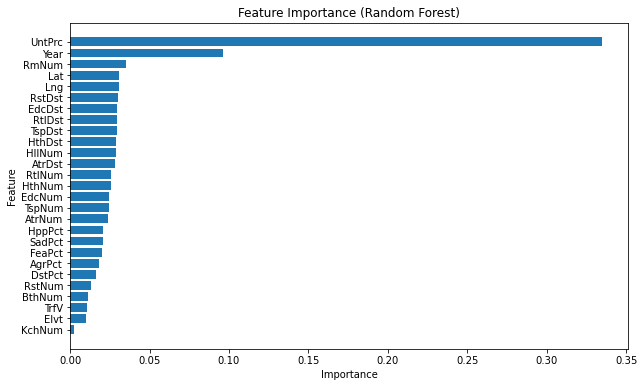

In [4]:
from sklearn.ensemble import RandomForestClassifier

df = data.drop('id', axis=1)
X = df.drop('TtlPrc', axis=1)
y = df['TtlPrc']

# Create and fit a Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in ascending order
importance_df = importance_df.sort_values(by='Importance')

# Create a horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.show()

In [5]:
# Filtering and removing unneccesary parameters for the purpose of investigation
# Removing the number of amenities because it is ambiguous to say how many amenities are in a city, distance is more important.
# Only including number of touristic atractions because that is the only amenity does that have an impact
# Removing some emotion parameters (the least important) based on feature importance
data = data.drop(['Elvt', 'KchNum', 'HllNum', 'EdcNum', 'HthNum', 'RtlNum', 'RstNum', 'DstPct', 'AgrPct'], axis=1)
data.head(5)

,id,TtlPrc,UntPrc,Year,RmNum,BthNum,Lat,Lng,TspNum,TspDst,AtrNum,AtrDst,EdcDst,HthDst,RstDst,RtlDst,TrfV,HppPct,SadPct,FeaPct
0,101087602731,24660,82533,2010,4,3,40.006694,116.486687,39,366,6,481,390,416,150,279,0.000000,33,20,24
1,101088604521,12000,67659,1999,3,2,39.979226,116.314551,44,395,27,470,140,492,208,397,23.570463,35,19,23
2,101089774839,16500,67205,2007,4,2,39.973845,116.463587,30,417,12,524,589,735,238,446,41.096296,33,21,18
3,101089814532,4430,74996,1985,2,1,39.962995,116.449455,50,343,28,565,417,695,187,357,36.396620,33,22,21
4,101090871638,5500,32682,2003,3,2,39.943112,116.109599,48,397,10,642,436,535,180,478,0.000000,32,24,19


# Correlation Matrix for Feature Comparison

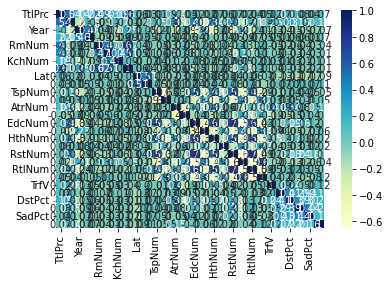

In [6]:
# Creating Correlation Matrix

import seaborn as sb

# create a correlation matrix of the features
corr_matrix = round(df.corr(), 2)

# create heatmap
sb.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

# Linear Model for Feature Comparison

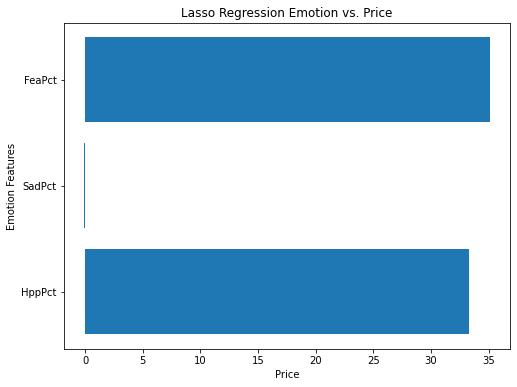

In [7]:
# PRICE VS EMOTION
from sklearn.linear_model import Lasso

X = df[['HppPct', 'SadPct', 'FeaPct']]  # Independent variables
y = df['TtlPrc']  # Dependent variable

# Create a Lasso regression model
lasso = Lasso(alpha=1.0)  # Adjust the alpha (regularization strength) as needed

# Fit the model
lasso.fit(X, y)

# Get the coefficients of the features
feature_coefficients = lasso.coef_

# Names of the features
feature_names = X.columns

# Create a bar chart to compare the coefficients
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_coefficients)
plt.xlabel('Price')
plt.ylabel('Emotion Features')
plt.title('Lasso Regression Emotion vs. Price')
plt.show()

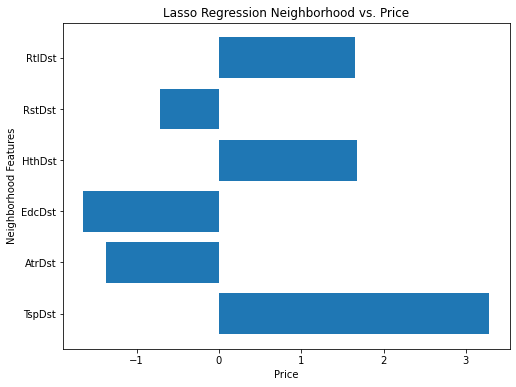

In [8]:
# PRICE VS NEIGHBORHOOD

X = df[['TspDst', 'AtrDst', 'EdcDst', 'HthDst', 'RstDst', 'RtlDst']]  # Independent variables
y = df['TtlPrc']  # Dependent variable

# Create a Lasso regression model
lasso = Lasso(alpha=1.0)  # Adjust the alpha (regularization strength) as needed

# Fit the model
lasso.fit(X, y)

# Get the coefficients of the features
feature_coefficients = lasso.coef_

# Names of the features
feature_names = X.columns

# Create a bar chart to compare the coefficients
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_coefficients)
plt.xlabel('Price')
plt.ylabel('Neighborhood Features')
plt.title('Lasso Regression Neighborhood vs. Price')
plt.show()

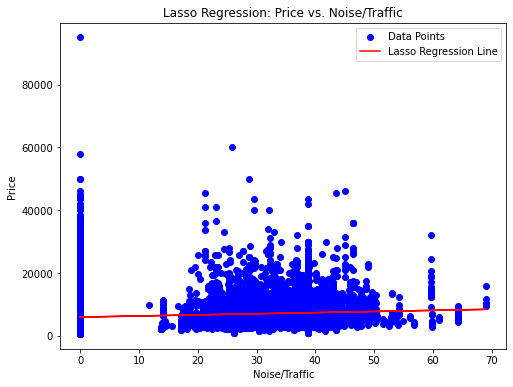

In [27]:
# PRICE VS NOISE/TRAFFIC

X = df['TrfV'].values.reshape(-1,1)  # Independent variables
y = df['TtlPrc']  # Dependent variable

# Create a Lasso regression model
lasso = Lasso(alpha=1.0)  # Adjust the alpha (regularization strength) as needed

# Fit the model
lasso.fit(X, y)

# Get the coefficients and intercept
coeff = lasso.coef_
intercept = lasso.intercept_

# Predict using the Lasso model
y_pred = lasso.predict(X)

# Create a scatter plot with the Lasso regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data Points', color='b')
plt.plot(X, y_pred, label='Lasso Regression Line', color='r')
plt.xlabel('Noise/Traffic')
plt.ylabel('Price')
plt.legend()
plt.title('Lasso Regression: Price vs. Noise/Traffic')
plt.show()

# Splitting process for modeling

In [28]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
# Here, the code is splitted into training (70%), testing (15%), and validation (15%) sets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the shapes of the resulting sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Train set shape: (19985, 1) (19985,)
Test set shape: (4282, 1) (4282,)
Validation set shape: (4283, 1) (4283,)


# Modeling with SVM

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

# Reloading the pre split dataset with values: X_train, X_test, X_val, y_train, y_test, y_val

# Create an SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Predict on the validation and test sets
y_val_pred = svm_model.predict(X_val)
y_test_pred = svm_model.predict(X_test)

# Calculate RMSE and MAE for validation set
svm_rmse_val = sqrt(mean_squared_error(y_val, y_val_pred))
svm_mae_val = mean_absolute_error(y_val, y_val_pred)

# Calculate accuracy for validation and test sets
svm_accuracy_val = accuracy_score(y_val, y_val_pred)
svm_accuracy_test = accuracy_score(y_test, y_test_pred)

print("Validation RMSE:", svm_rmse_val)
print("Validation MAE:", svm_mae_val)
print("Validation Accuracy:", svm_accuracy_val)
print("Test Accuracy:", svm_accuracy_test)

Validation RMSE: 4786.511034266824
Validation MAE: 2725.395050198459
Validation Accuracy: 0.015643240719122112
Test Accuracy: 0.014012143858010275


# Modeling with RANDOM FOREST

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from math import sqrt

# Create a Random Forest regression model
rf_regressor = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the validation and test sets
y_val_pred = rf_regressor.predict(X_val)
y_test_pred = rf_regressor.predict(X_test)

# Calculate RMSE and MAE for the validation set
forest_rmse_val = sqrt(mean_squared_error(y_val, y_val_pred))
forest_mae_val = mean_absolute_error(y_val, y_val_pred)

# Calculate accuracy for validation and test sets
forest_accuracy_val = accuracy_score(y_val, y_val_pred)
forest_accuracy_test = accuracy_score(y_test, y_test_pred)

print("Validation RMSE:", forest_rmse_val)
print("Validation MAE:", forest_mae_val)
print("Validation Accuracy:", forest_accuracy_val)
print("Test Accuracy:", forest_accuracy_test)         

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

# Modeling with DECISION TREES

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Predict on the validation and test sets
y_val_pred = dt_classifier.predict(X_val.reshape(-1, 1))
y_test_pred = dt_classifier.predict(X_test.reshape(-1, 1))

# Calculate RMSE and MAE for the validation set (for regression)
trees_rmse_val = sqrt(mean_squared_error(y_val, y_val_pred))
trees_mae_val = mean_absolute_error(y_val, y_val_pred)

# Calculate accuracy for validation and test sets (for classification)
trees_accuracy_val = accuracy_score(y_val, y_val_pred)
trees_accuracy_test = accuracy_score(y_test, y_test_pred)

print("Validation RMSE:", trees_rmse_val)
print("Validation MAE:", trees_mae_val)
print("Validation Accuracy:", trees_accuracy_val)
print("Test Accuracy:", trees_accuracy_test)


Validation RMSE: 4573.266632689664
Validation MAE: 2581.7296287648846
Validation Accuracy: 0.015409759514359094
Test Accuracy: 0.01681457262961233


# Modeling for XGBOOST

In [16]:
from xgboost import XGBRegressor

# Create an XGBoost regressor model
xgb_regressor = XGBRegressor(random_state=42)

# Fit the model on the training data
xgb_regressor.fit(X_train, y_train)

# Predict on the validation and test sets
y_val_pred = xgb_regressor.predict(X_val)
y_test_pred = xgb_regressor.predict(X_test)

# Calculate RMSE and MAE for the validation set
XGBreg_rmse_val = sqrt(mean_squared_error(y_val, y_val_pred))
XGBreg_mae_val = mean_absolute_error(y_val, y_val_pred)

# Calculate RMSE and MAE for the test set
XGBreg_rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))
XGBreg_mae_test = mean_absolute_error(y_test, y_test_pred)

print("Validation RMSE:", XGBreg_rmse_val)
print("Validation MAE:", XGBreg_mae_val)
print("Test RMSE:", XGBreg_rmse_test)
print("Test MAE:", XGBreg_mae_test)

Validation RMSE: 4166.044954770931
Validation MAE: 2651.0496327687224
Test RMSE: 3871.5296028243924
Test MAE: 2529.5759414751246


In [17]:
# Other methods

from xgboost import XGBClassifier

# Create an XGBoost classifier model
xgb_classifier = XGBClassifier(random_state=42)

# Fit the model on the training data
xgb_classifier.fit(X_train, y_train)

# Predict on the validation and test sets
y_val_pred = xgb_classifier.predict(X_val)
y_test_pred = xgb_classifier.predict(X_test)

# Calculate RMSE and MAE for the validation set
XGBcla_rmse_val = sqrt(mean_squared_error(y_val, y_val_pred))
XGBcla_mae_val = mean_absolute_error(y_val, y_val_pred)

# Calculate accuracy for validation and test sets
XGBcla_accuracy_val = accuracy_score(y_val, y_val_pred)
XGBcla_accuracy_test = accuracy_score(y_test, y_test_pred)

print("Validation RMSE:", XGBcla_rmse_val)
print("Validation MAE:", XGBcla_mae_val)
print("Validation Accuracy:", XGBcla_accuracy_val)
print("Test Accuracy:", XGBcla_accuracy_test)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [   0    1    2 ... 1264 1265 1266], got [  660   700   730 ... 50000 58000 95000]

# Modeling for LOGISTIC REGRESSION

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

# Fit the model on the training data
logistic_regression.fit(X_train, y_train)

# Predict on the validation and test sets
y_val_pred = logistic_regression.predict(X_val.reshape(-1, 1))
y_test_pred = logistic_regression.predict(X_test.reshape(-1, 1))

# Calculate accuracy for validation and test sets
LR_accuracy_val = accuracy_score(y_val, y_val_pred)
LR_accuracy_test = accuracy_score(y_test, y_test_pred)

print("Validation Accuracy:", LR_accuracy_val)
print("Test Accuracy:", LR_accuracy_test)

Validation Accuracy: 0.013775391081017978
Test Accuracy: 0.012610929472209247


# Model Accuracy Comparison

In [36]:
# Define the data
labels = ['SVM', 'Random Forest', 'Decision Trees', 'XGBoost Reg', 'Logistic Reg']
values = [svm_accuracy_val, forest_accuracy_val, trees_accuracy_val, XGBcla_accuracy_val, LR_accuracy_val]

# Create a bar plot with the specified values
fig, ax = plt.subplots()
ax.bar(labels, values)

# Set the plot title and axis labels
ax.set_title('Accuracy Comparison', fontsize=18)
ax.set_xlabel('Methods', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.legend(['Methods'])

# Set the range of the y-axis
ax.set_ylim(0, 1)

# Add annotations for each bar
for i, v in enumerate(values):
    ax.text(i, v + 0.01, str(v), ha='center', fontweight='bold')

# Display the plot
plt.show()

NameError: name 'forest_accuracy_val' is not defined

# Model RMSE Comparison

In [ ]:
# Missing we have to see if the code runs first

# Model MAE Comparison

In [ ]:
# Missing we have to see if the code runs first

In [ ]:
# Done!